In [1]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-v0_8-deep')

In [2]:
#считываем датасет с диска
df = pd.read_csv('https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Предобработка и изучение данных

In [3]:
#проверим датасет на наличие пропущенных значений
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#проверяем, какого типа у нас ячейки - категориальные или числовые
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#так как все столбцы числовые, то посмотрим описательную статистику датасета
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


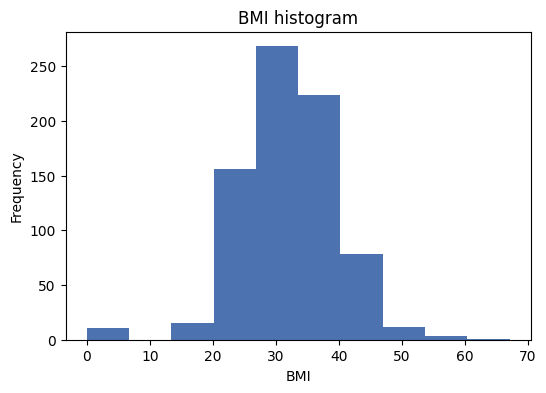

In [6]:
#Построим гистограмму для признаков, чтобы проверить, насколько целесообразно использовать их для обучения
plt.hist(df['BMI'])

plt.title('BMI histogram')
plt.ylabel('Frequency')
plt.xlabel('BMI')

plt.show()

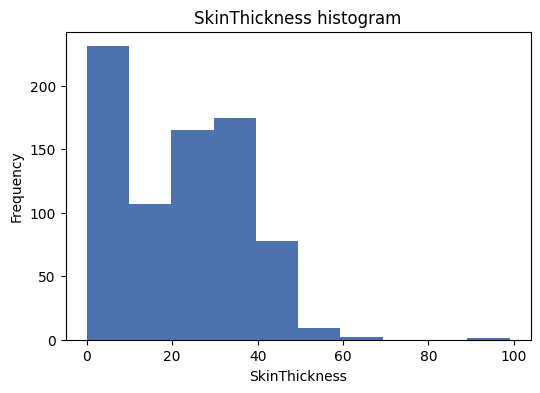

In [7]:
plt.hist(df['SkinThickness'])

plt.title('SkinThickness histogram')
plt.ylabel('Frequency')
plt.xlabel('SkinThickness')

plt.show()

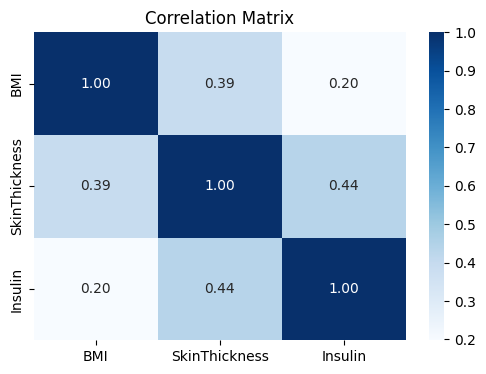

In [8]:
# Вычисление корреляционной матрицы
corr = df[['BMI', 'SkinThickness', 'Insulin']].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

###Применение моделей

In [9]:
#Используем пайплайн для удобства, в для стандартизации данных используем StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error as mse

In [10]:
#Выделим признаки и целевую переменную
X = df[['BMI', 'SkinThickness']]
y = df['Insulin']
#Разделим их на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

####Линейная регрессия

In [12]:
linear_regression = Pipeline([
    ('Scaler', StandardScaler()),
    ('LR', LinearRegression())
])

linear_regression.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(linear_regression.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(linear_regression.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.179
R2 для тестовой выборки: 0.255


####Lasso-регрессия

In [14]:
Lasso_reg = Pipeline([
    ('Scaler', StandardScaler()),
    ('Lasso', Lasso(alpha = 0.1))
])


Lasso_reg.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(Lasso_reg.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(Lasso_reg.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.179
R2 для тестовой выборки: 0.255


####Ridge-регрессия

In [16]:
Ridge_reg = Pipeline([
    ('Scaler', StandardScaler()),
    ('Ridge', Ridge(alpha = 0.1))
])

Ridge_reg.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(Ridge_reg.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(Ridge_reg.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.179
R2 для тестовой выборки: 0.255


####ElasticNet-регрессия

In [17]:
ElasticNet_reg = Pipeline([
    ('Scaler', StandardScaler()),
    ('ElasticNet', ElasticNet(alpha = 0.1))
])

ElasticNet_reg.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(ElasticNet_reg.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(ElasticNet_reg.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.179
R2 для тестовой выборки: 0.256


####Полиномиальная регрессия

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
#Полином второй степени
Poly2 = Pipeline([
    ('Scaler', StandardScaler()),
    ('PF', PolynomialFeatures(degree = 2)),
    ('LR', LinearRegression())
])

Poly2.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(Poly2.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(Poly2.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.21
R2 для тестовой выборки: 0.262


In [22]:
#Полином пятой степени
Poly5 = Pipeline([
    ('Scaler', StandardScaler()),
    ('PF', PolynomialFeatures(degree = 5)),
    ('LR', LinearRegression())
])

Poly5.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(Poly5.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(Poly5.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.286
R2 для тестовой выборки: -0.143


In [23]:
#Полином десятой степени
Poly10 = Pipeline([
    ('Scaler', StandardScaler()),
    ('PF', PolynomialFeatures(degree = 5)),
    ('LR', LinearRegression())
])

Poly10.fit(X_train, y_train)

print('R2 для тренировочной выборки:', round(Poly10.score(X_train, y_train), 3))
print('R2 для тестовой выборки:', round(Poly10.score(X_test, y_test), 3))

R2 для тренировочной выборки: 0.286
R2 для тестовой выборки: -0.143
